##   泰坦尼克号数据处理

[数据处理](http://www.fuyangzhen.com/uk/blog/00147109529011688ef607e9c6b4aa291510e3eaaa9b595000)

[Kaggle 实例学习](http://blog.csdn.net/qq_23851075/article/details/51311357)

In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df = df.drop(['Ticket','Cabin'],axis=1)  # 删除不相干列
df = df.dropna()  # 删除不全的 rows

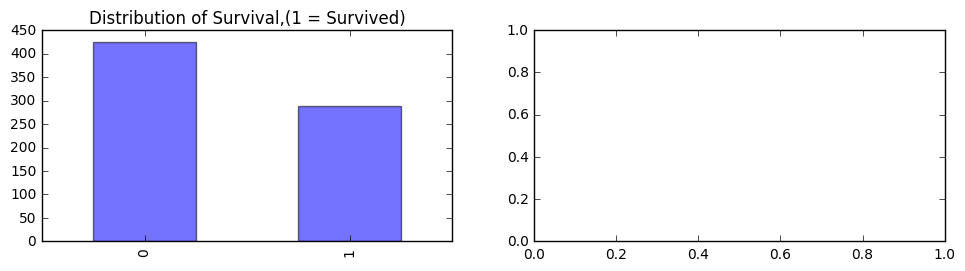

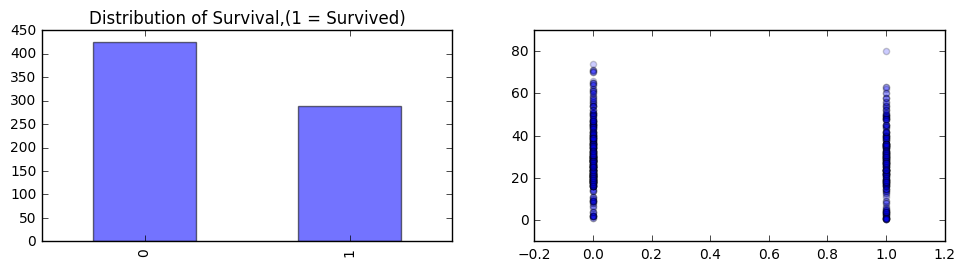

In [18]:
#  指定图的参数
fig = plt.figure(figsize=(18,6),dpi=100)
alpha_bar = 0.55  # 条形图透明度
alpha_scatter = 0.2 # 散点图

# 幸存数量对比
ax1 = plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar',alpha=alpha_bar)
plt.title('Distribution of Survival,(1 = Survived)')


# 年轮与幸存数量的关系
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived,df.Age,alpha=alpha_scatter)

plt.show()

In [21]:
#  乘客等级与获救情况关系
fig = plt.figure()
fig.set(alpha=0.2)

Survived0 = df.Pclass[df.Survived == 0].value_counts()
Survived1 = df.Pclass[df.Survived == 1].value_counts()
print "Survived0:"
print Survived0
print "Survived1:"
print Survived1

Survived0:
3    270
2     90
1     64
Name: Pclass, dtype: int64
Survived1:
1    120
3     85
2     83
Name: Pclass, dtype: int64


In [22]:
datf = pd.DataFrame({u'rescued':Survived0,u'unrescued':Survived1})
datf

,rescued,unrescued
1,64,120
2,90,83
3,270,85


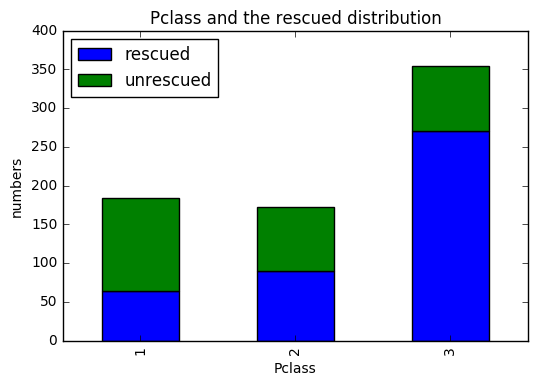

In [25]:
datf.plot(kind='bar',stacked=True)
plt.title(u'Pclass and the rescued distribution')
plt.xlabel(u'Pclass')
plt.ylabel(u'numbers')
plt.show()

In [42]:
# 查看性别与幸存数量的关系
Survied_male = df.Survived[df.Sex=='male'].value_counts()
print 'Survied_male'
print Survied_male
Survied_female = df.Survived[df.Sex=='female'].value_counts()
print 'Survied_female'
print Survied_female
malef = DataFrame({u'male':Survied_male,u'female':Survied_female})
malef

Survied_male
0    360
1     93
Name: Survived, dtype: int64
Survied_female
1    195
0     64
Name: Survived, dtype: int64


,female,male
0,64,360
1,195,93


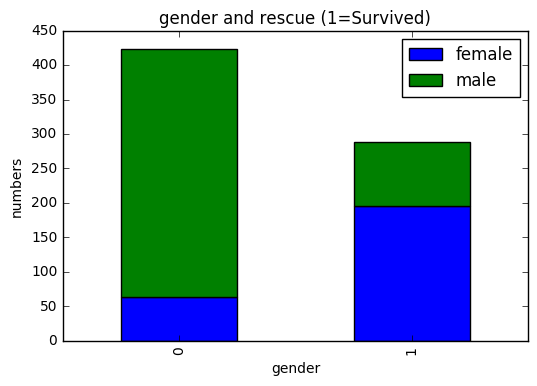

In [43]:
malef.plot(kind='bar',stacked=True)
plt.title(u'gender and rescue (1=Survived)')
plt.xlabel(u'gender')
plt.ylabel(u'numbers')
plt.show()

In [47]:
malef = malef.transpose()
malef

,0,1
female,64,195
male,360,93


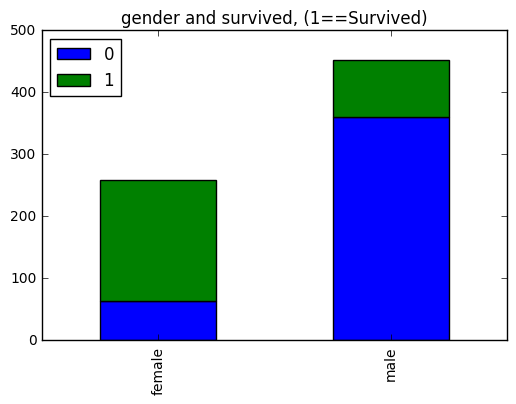

In [49]:
malef.plot(kind='bar',stacked=True)
plt.title(u'gender and survived, (1==Survived)')
plt.show()